# Preprocessing and Feature Engineering

In [ ]:
import nltk
import string
import re
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import svm
import itertools
from mlxtend.evaluate import bias_variance_decomp
import socket

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('gutenberg')

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
list_of_books=["austen-emma.txt","bryant-stories.txt","carroll-alice.txt","burgess-busterbrown.txt","edgeworth-parents.txt"]

In [ ]:
list_of_authors=["Jane Austen","Sara Cone Bryant","Lewis Carroll","Thornton W. Burgess","Maria Edgeworth"]

In [ ]:
#collect all the used functions in one function to call them at once 


In [ ]:

#print(dff.iloc[:,0])

In [ ]:
#read the list of books from nltk.corpus.gutenberg.words
# the function takes the list of books and returns list of book words
def read_book(list_of_books):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  book_words=[]
  for book in list_of_books:
    
    book_words.append(nltk.corpus.gutenberg.raw(book))
  return book_words

In [ ]:
books=read_book(list_of_books)
print(books[4][0:60])

[The Parent's Assistant, by Maria Edgeworth]


THE ORPHAN


In [ ]:
# first step in cleaning the raw text is to remove the punctuation marks
# This function takes list of book words and returns list of books words without punctuation marks
def cleaning(books):
  remove_pun=[]
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  for b in books:
    new_words = tokenizer.tokenize(b)
    remove_pun.append(new_words)
  return remove_pun 




In [ ]:
clean_book=cleaning(books)
print(len(clean_book[0]))

161983


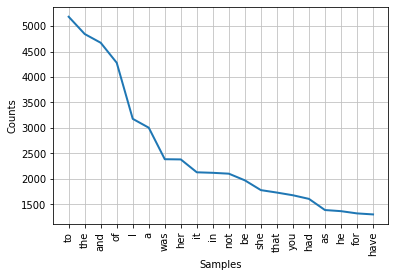

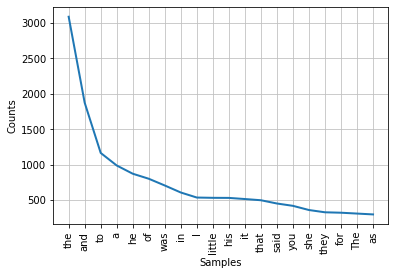

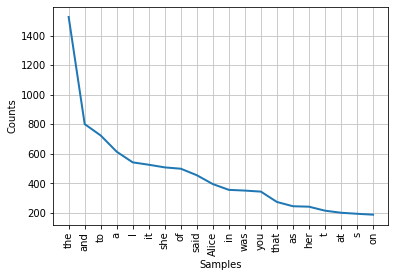

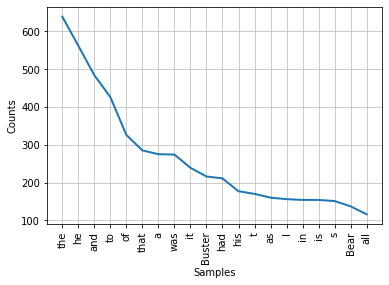

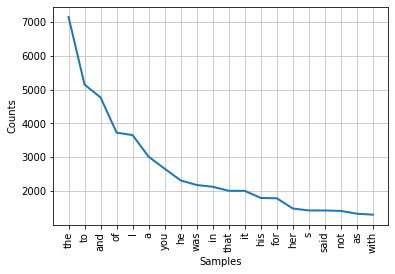

In [ ]:
for i in range(len(clean_book)):
  freq = nltk.FreqDist(clean_book[i])
  freq.plot(20, cumulative=False)

In [ ]:
#second step in cleaning raw text is to remove stop words
#remove_stopwords(clean_book):takes cleaned book without punctuation marks and returns cleaned book without stop words 
def remove_stopwords(clean_book):
  stop_words = set(stopwords.words('english')+['could','can','may','might','would','will','miss','mr','mrs','said','say','must','should'])
  removestopword=[]
  for i in clean_book:
    remove_stopword=[]
    for cb in i:
      if cb.lower() not in stop_words:
        remove_stopword.append(cb)
    removestopword.append(remove_stopword)
  return removestopword

In [ ]:
removed_stopedword=remove_stopwords(clean_book)
print(removed_stopedword[0])

['Emma', 'Jane', 'Austen', '1816', 'VOLUME', 'CHAPTER', 'Emma', 'Woodhouse', 'handsome', 'clever', 'rich', 'comfortable', 'home', 'happy', 'disposition', 'seemed', 'unite', 'best', 'blessings', 'existence', 'lived', 'nearly', 'twenty', 'one', 'years', 'world', 'little', 'distress', 'vex', 'youngest', 'two', 'daughters', 'affectionate', 'indulgent', 'father', 'consequence', 'sister', 'marriage', 'mistress', 'house', 'early', 'period', 'mother', 'died', 'long', 'ago', 'indistinct', 'remembrance', 'caresses', 'place', 'supplied', 'excellent', 'woman', 'governess', 'fallen', 'little', 'short', 'mother', 'affection', 'Sixteen', 'years', 'Taylor', 'Woodhouse', 'family', 'less', 'governess', 'friend', 'fond', 'daughters', 'particularly', 'Emma', '_them_', 'intimacy', 'sisters', 'Even', 'Taylor', 'ceased', 'hold', 'nominal', 'office', 'governess', 'mildness', 'temper', 'hardly', 'allowed', 'impose', 'restraint', 'shadow', 'authority', 'long', 'passed', 'away', 'living', 'together', 'friend', '

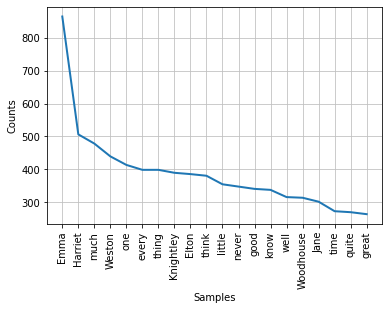

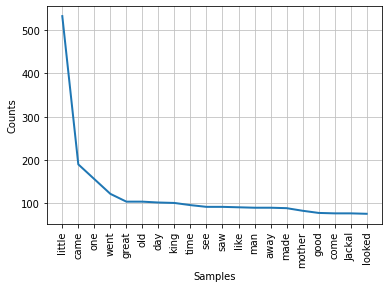

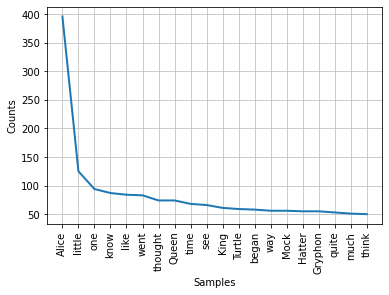

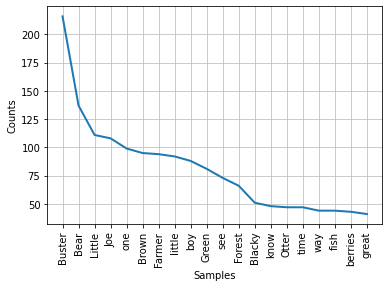

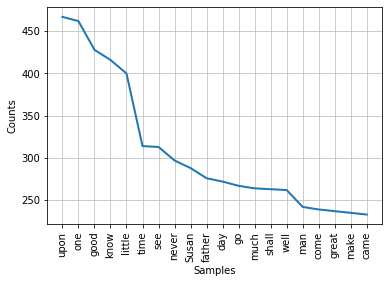

In [ ]:
for i in range(len(removed_stopedword)):
  freq = nltk.FreqDist(removed_stopedword[i])

  freq.plot(20, cumulative=False)

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

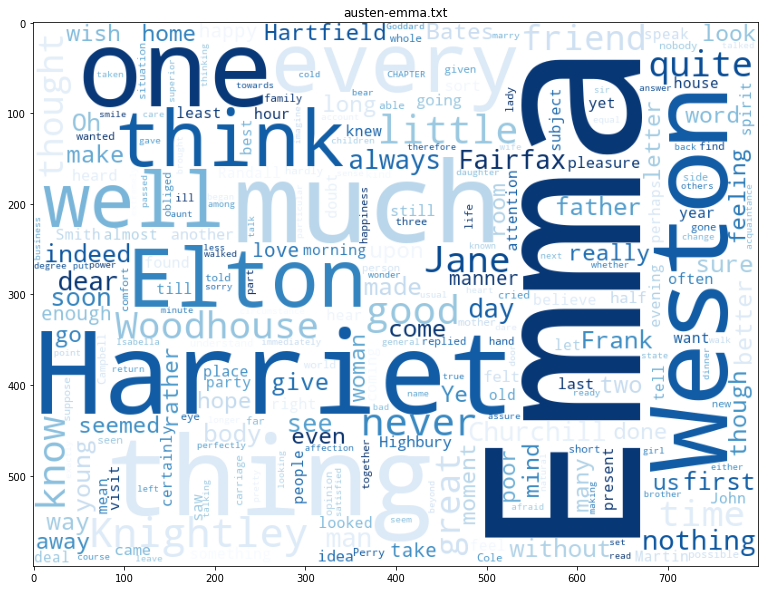

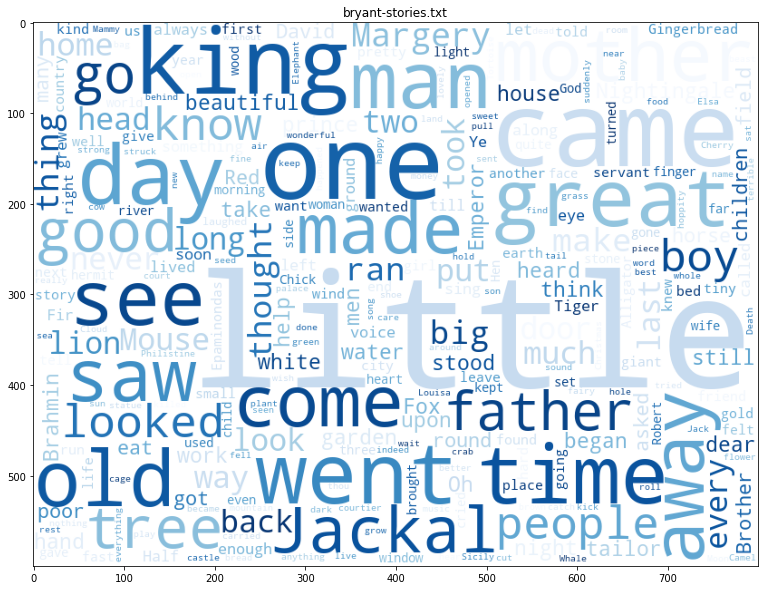

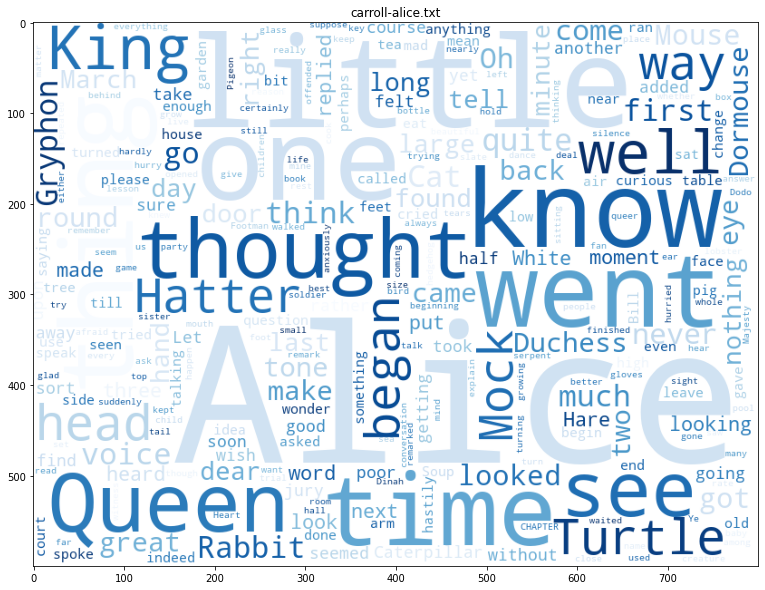

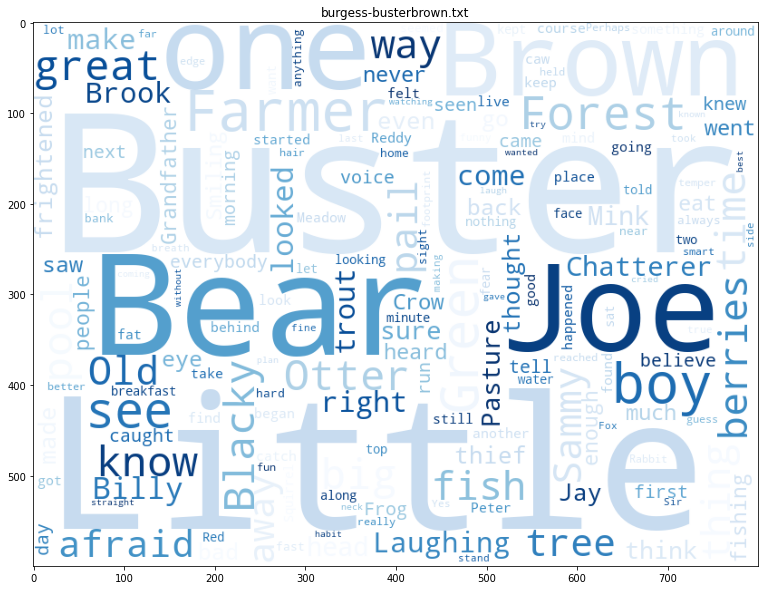

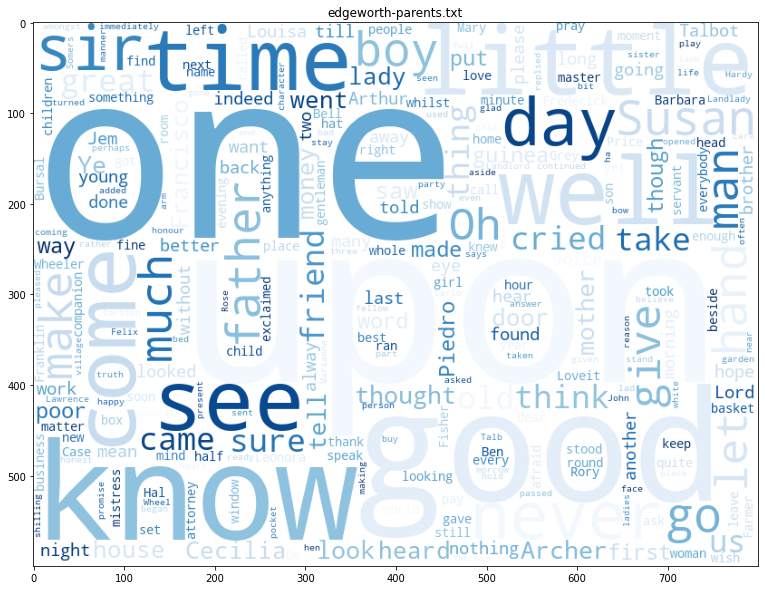

In [ ]:
for i in range(len(removed_stopedword)):
  wordcloud = WordCloud(background_color='white',width=800, height=600, \
                      min_font_size=10, max_words=500, collocations=False,  colormap="Blues")
  wordcloud.generate(" ".join(removed_stopedword[i]))

  plt.figure(figsize=(15, 10))
  plt.title(list_of_books[i])
  plt.imshow(wordcloud)
  plt.show()

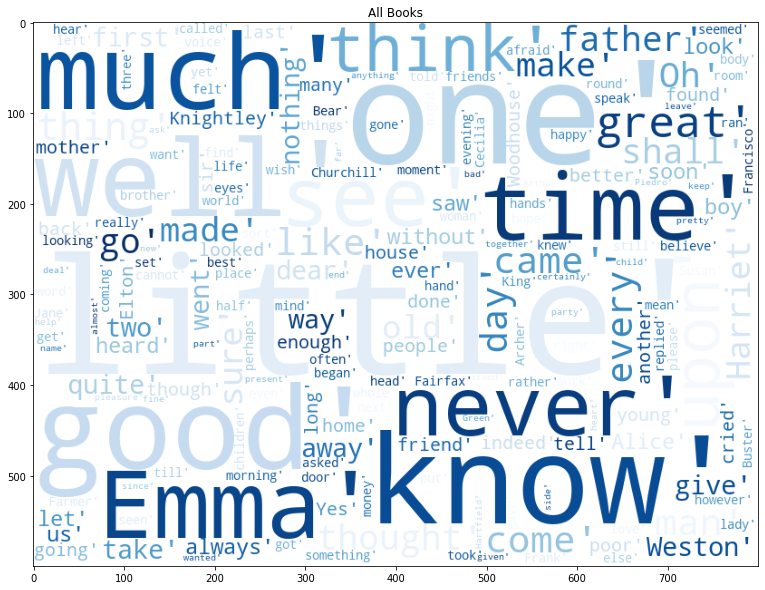

In [ ]:
wordcloud = WordCloud(background_color='white',width=800, height=600, \
                      min_font_size=10, max_words=500, collocations=False,  colormap="Blues")
wordcloud.generate(str(removed_stopedword))

plt.figure(figsize=(15, 10))
plt.title("All Books")
plt.imshow(wordcloud)
plt.show()

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def Lemmatisation_Stemming(book_lst, flg_stemm=False, flg_lemm=True):
  ll=[]
  for b in book_lst:
    lst_text=[]
  ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
      for w in b:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text.append(ps.stem(w))
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
      lemmatizer = WordNetLemmatizer()
      
      for w in b:
        lst_text.append(lemmatizer.lemmatize(w, get_wordnet_pos(w)))
    ll.append(lst_text)
    # ll.append(' '.join(lst_text))
  
  return ll



In [ ]:
# lem = nltk.stem.wordnet.WordNetLemmatizer()
# word= "thaught"
# tag = nltk.pos_tag([word])
# print(tag)
# lst_text = lem.lemmatize(word,pos= tag)
# lst_text

In [ ]:
lORs=Lemmatisation_Stemming(removed_stopedword)
print(len(lORs[0]))
# lORs

KeyboardInterrupt: ignored

In [ ]:
# dump = list(partitionList(lORs[0],100))
# dump

In [ ]:

def generate_random_indeces(length):
  import random
  lst = []
  for i in range(200):
    tmp = random.randint(0,length-100)
    lst.append(tmp)
  return lst

In [ ]:
#split the book words to 200 sample each sample is of 100 words
# def splitting(removed_stopedword):
  
#   books = []
#   for clean_book in removed_stopedword:
#     sentences=[]
#     indices = generate_random_indeces(len(clean_book))
#     for i in indices:
#       sentences.append(' '.join(clean_book[i:i+100]))
#     books.append(sentences)
#   return books

In [ ]:
def joined_sentences(sentences):
  joined = []
  for i in sentences:
    book=[]
    for w in i:
      book.append(' '.join(w))
    joined.append(book)
  return joined

In [ ]:
def join_to_sen(sentences):
  book=[]
  for i in sentences:
    for b in i :
      book.append(' '.join(b)) 
  
  return book

In [ ]:
words_num = 100
def splitting_to_words(removed_stopedword):
  books = []
  for clean_book in removed_stopedword:
    sentences=[]
    indices = generate_random_indeces(len(clean_book))
    for i in indices:
      sentences.append(clean_book[i:i+words_num])
    books.append(sentences)
  return books

In [ ]:
splitss=splitting_to_words(lORs)
jj=joined_sentences(splitss)
len(jj[0])

In [ ]:
#labels the list of books
def labeling(list_of_authors):
  labels=[]
  for i in list_of_authors:
    for j in range(200):
      labels.append(i)
  
  return label_encoders(labels)

In [ ]:
def labeling_sentence(splitss):
  labels=[]
  for i in splitss:
    for j in i:
      labels.append(j)
  
  return labels

In [ ]:
print(len(labeling_sentence(splitss)))

In [ ]:
authors=labeling_sentence(list_of_authors)
len(authors)


In [ ]:
#label encoder
def label_encoders(authors):
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le.fit(authors)
  labeles=le.transform(authors)

  

  return labeles


In [ ]:
def dispaly_Dataframe(wsplits,splitss,list_of_authors):
  import pandas as pd
  df = pd.DataFrame()
  df['sentences'] = labeling_sentence(splitss)
  df['Words'] = labeling_sentence(wsplits)
  df['Authors_Names'] = labeling(list_of_authors)
  
  return df



In [ ]:
#dispaly_Dataframe(splitss,list_of_authors)

In [ ]:

def function_collection(list_of_books):
  books=read_book(list_of_books)
  clean_book=cleaning(books)
  removed_stopedword=remove_stopwords(clean_book)
  lORs=Lemmatisation_Stemming(removed_stopedword)
  wsplits=splitting_to_words(lORs)
  join_words=joined_sentences(wsplits)
  return dispaly_Dataframe(wsplits,join_words,list_of_authors)


dff=function_collection(list_of_books) 


In [ ]:
dff

In [ ]:
books=read_book(list_of_books)
clean_book=cleaning(books)
removed_stopedword=remove_stopwords(clean_book)
lORs=Lemmatisation_Stemming(removed_stopedword)
wsplits=splitting_to_words(lORs)
join_words=joined_sentences(wsplits)
ww=join_to_sen(wsplits)
data_frame=dispaly_Dataframe(wsplits,join_words,list_of_authors)


In [ ]:
join_words[0]

['make inquiry wish make yet Oh dear cannot begin early aware difficulty procure exactly desirable thing aware Jane shake head dear Elton thought do see much world know many candidate always _first_ situation saw vast deal neighbourhood round Maple Grove cousin Suckling Bragge infinity application every body anxious family move first circle Wax candle schoolroom imagine desirable house kingdom Bragge one wish see Colonel Campbell town midsummer Jane spend time sure want afterwards probably glad dispose wish take trouble make inquiry present Trouble aye know scruple afraid give trouble assure dear Jane Campbells hardly interested shall write Partridge day two',
 'burn wrong know keep remembrance married knew resolution enough part Harriet necessary burn court plaister word bit old pencil court plaister useful shall happier burn reply Harriet disagreeable look get rid every thing go end thank Heaven Elton thought Emma begin Churchill soon afterwards reason believe begin already make hope

In [ ]:
data_frame

,sentences,Words,Authors_Names
0,make inquiry wish make yet Oh dear cannot begi...,"[make, inquiry, wish, make, yet, Oh, dear, can...",0
1,burn wrong know keep remembrance married knew ...,"[burn, wrong, know, keep, remembrance, married...",0
2,favour exercise patient answer short note Fair...,"[favour, exercise, patient, answer, short, not...",0
3,Woodhouse take Hartfield felt ought attempt pl...,"[Woodhouse, take, Hartfield, felt, ought, atte...",0
4,Churchill therefore seem thing even occur fort...,"[Churchill, therefore, seem, thing, even, occu...",0
...,...,...,...
995,hole window shutter Archer immediately saw pie...,"[hole, window, shutter, Archer, immediately, s...",2
996,never morrow yesterday day hesitate almost cer...,"[never, morrow, yesterday, day, hesitate, almo...",2
997,come run call father voice heard instant oblig...,"[come, run, call, father, voice, heard, instan...",2
998,china work cause go beg add put Flora delibera...,"[china, work, cause, go, beg, add, put, Flora,...",2


Tranformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
count_vect = CountVectorizer(stop_words='english', max_features=200)
all_records = np.array(join_words).reshape((-1,1))
BOWs = count_vect.fit_transform(all_records.ravel()).toarray()
# print(len(BOWs[0]))
BOWs

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
data_frame['BOW'] = list(BOWs)

In [ ]:
print(len(BOWs[0]))

200


In [ ]:
data_frame['BOW']

0      [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
1      [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, ...
2      [0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...
3      [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                             ...                        
995    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
996    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
997    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
998    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
999    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: BOW, Length: 1000, dtype: object

In [ ]:
df = data_frame.sample(frac = 1)
df

,sentences,Words,Authors_Names,BOW,BOW_n grams,tf_n grams,TF-IDF
303,man band broke convent garden stole away one n...,"[man, band, broke, convent, garden, stole, awa...",3,"[0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
474,Rabbit pink eye ran close nothing remarkable A...,"[Rabbit, pink, eye, ran, close, nothing, remar...",1,"[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
358,sound hammer every day hammer hammer reputatio...,"[sound, hammer, every, day, hammer, hammer, re...",3,"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
769,caught frighten fish eat many Besides remember...,"[caught, frighten, fish, eat, many, Besides, r...",4,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
513,taste find nice fact sort mixed flavour cherry...,"[taste, find, nice, fact, sort, mixed, flavour...",1,"[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
736,come back look top tree ought know time good c...,"[come, back, look, top, tree, ought, know, tim...",4,"[1, 0, 0, 0, 2, 3, 2, 0, 0, 0, 2, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
330,pie do make see do set em doorstep cool Well h...,"[pie, do, make, see, do, set, em, doorstep, co...",3,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14,superior charge three little girl delightful c...,"[superior, charge, three, little, girl, deligh...",0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
212,enough take tub carry away happy Little Fir Tr...,"[enough, take, tub, carry, away, happy, Little...",3,"[0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Model evaluation

### **plotting functions**

1.   confusion matrix




In [ ]:

def confusion_matrix_binary_classes(y_test,y_pred):
  print(confusion_matrix(y_test, y_pred))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred ), annot=True, cmap='PuBuGn')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('SVM Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(y_test,y_pred))

2. Cross validation visualization
   ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [ ]:
from sklearn.model_selection import validation_curve
def plot_cv_indices(clf, X, y,param_name,parameter_range,  cv=10,model_name ="SVM"):
 
  train_score, test_score = validation_curve(clf, X, y,
                                       param_name = param_name,
                                       param_range = parameter_range,
                                        cv = cv, scoring = "accuracy",n_jobs=2)
 
# Calculating mean and standard deviation of training score
  mean_train_score = np.mean(train_score, axis = 1)
  std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
  mean_test_score = np.mean(test_score, axis = 1)
  std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
  plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
  plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
  plt.title(f"Validation Curve with {model_name} Classifier")
  plt.xlabel(f"Value of {param_name}")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

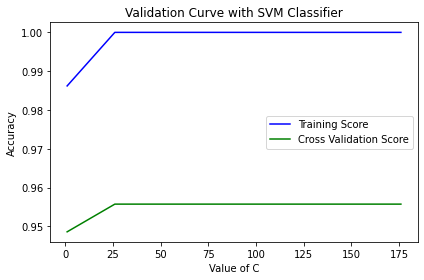

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = svm.SVC()
param_range = np.arange(1, 200, 25)
plot_cv_indices(clf, X_train, y_train ,"C", param_range ,  cv=10 ,model_name = "SVM")

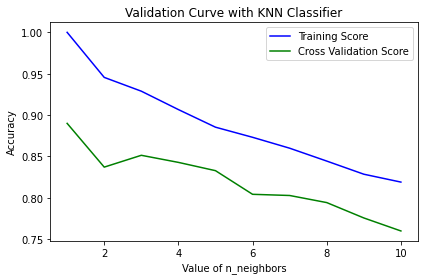

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
# param_range = np.logspace(-6, -1, 5)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clf, X_train, y_train ,"n_neighbors", param_range ,  cv=10 ,model_name = "KNN")

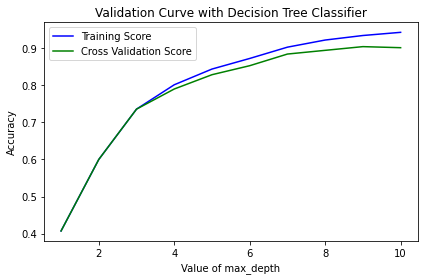

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
param_range = np.arange(1, 11, 1)
plot_cv_indices(clf, X_train, y_train ,"max_depth", param_range ,  cv=10 ,model_name = "Decision Tree")
#clf.get_params()

In [ ]:
def add_padding(X):
  return np.array(list(zip(*itertools.zip_longest(*X , fillvalue=0))))


In [ ]:

def SVM(X_train, y_train,X_test, y_test):
  mode_svm = svm.SVC(kernel='linear', C=3).fit(X_train, y_train)
  mode_svm.score(X_test, y_test)
  y_pred=mode_svm.predict(X_test)
  print("score = ",mode_svm.score(X_test,y_test)*100)
  confusion_matrix_binary_classes(y_test,y_pred)
  return 

score =  89.0
[[55  0 11  0  0]
 [ 0 57  4  0  0]
 [ 0  0 55  0  0]
 [ 0  0 16 43  0]
 [ 0  0  2  0 57]]


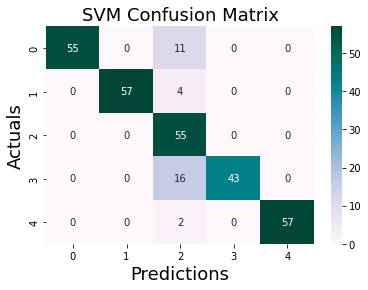

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        66
           1       1.00      0.93      0.97        61
           2       0.62      1.00      0.77        55
           3       1.00      0.73      0.84        59
           4       1.00      0.97      0.98        59

    accuracy                           0.89       300
   macro avg       0.93      0.89      0.89       300
weighted avg       0.93      0.89      0.90       300



In [ ]:
SVM(X_train, y_train,X_test, y_test)

In [ ]:
def KNN(X_train, y_train,X_test, y_test):
  clf = KNeighborsClassifier(n_neighbors=4)


In [ ]:
def plot_cross_val_scores(scores):
  plt.bar(range(1,len(scores)+1,1) , scores, width=0.5)
  

  plt.title("The score for each train-and-validation run")
  plt.xlabel("train-and-validation run")
  plt.ylabel("Score")
  plt.show()

def mesure_cross_vall(clf, X_train, y_train, cv=10):
  scores = cross_val_score(clf, X_train, y_train, cv=cv)
  print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  print("K-fold cross validation score: fo each ",scores)
  return scores

def evaluate_bias_variance(clf, X_train, y_train, X_test, y_test):
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',random_seed=123)
  print('Average expected loss: %.3f' % avg_expected_loss)
  print('Av erage bias: %.3f' % avg_bias)
  print('Average variance: %.3f' % avg_var)

def model_evaluation(clf, X_train, y_train,cv=10):
  scores = mesure_cross_vall(clf, X_train, y_train, cv)
  #plot_cross_val_scores(scores)
  # evaluate_bias_variance(clf, X_train, y_train, X_test, y_test)

* add padings

In [ ]:
model_evaluation(clf, X_train, y_train,cv=10)

Accuracy: 0.95 (+/- 0.05)
K-fold cross validation score: fo each  [0.94285714 0.94285714 0.91428571 0.91428571 0.97142857 0.97142857
 0.95714286 0.97142857 0.91428571 0.98571429]


In [ ]:
X = df.BOW.to_numpy()
y = df.Authors_Names.to_numpy()
X = add_padding(X)
print (X)
print (len(X))
print (type(X))


[[0 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1000
<class 'numpy.ndarray'>


* split the data to train and test 

In [ ]:
from sklearn.model_selection import train_test_split
# X = df.BOW.to_numpy()
# y = df.Authors_Names.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [ ]:
# for c in X_train:
  # print(c)
print(len(X_train))

700


## Evaluate the models

* SVM cross validaion:<br>bias_variance_decomp ref:
http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

In [ ]:
%pip install mlxtend --upgrade

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
import socket
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("K-fold cross val each score: ",scores)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Accuracy: 0.93 (+/- 0.07)
K-fold cross val each score:  [0.92857143 0.95714286 0.9        0.85714286 0.97142857 0.97142857
 0.91428571 0.9        0.92857143 0.92857143]
Average expected loss: 0.068
Average bias: 0.047
Average variance: 0.038


* SVM training

In [ ]:
mode_svm = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
mode_svm.score(X_test, y_test)
y_pred=mode_svm.predict(X_test)

In [ ]:
print("score = ",mode_svm.score(X_test,y_pred)*100)
confusion_matrix_binary_classes(y_test,y_pred)

* Naive bayes cross validation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("K-fold cross validation each score: ",scores)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

* Naive Byes Train

In [ ]:

model_NB = MultinomialNB().fit(X_train, y_train)
score = model_NB.score(X_test, y_test)
y_pred=model_NB.predict(X_test)
print(score*100)
confusion_matrix_binary_classes(y_test,y_pred)

* KNN Cross validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("K-fold cross validation each score: ",scores)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

* Decision Tree Classifier Cross validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("K-fold cross validation each score: ",scores)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

In [ ]:
n_splits = 10
n_points = 100
rng = np.random.RandomState(1338)
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(700, group_prior))
fig, ax = plt.subplots()
cv = KFold(n_splits)
# print("X= ",X)
# print("y= ",y)
# groups= groups+[0]*700
# print("groups= ",groups)
# print("ax= ",ax)
plot_cv_indices(cv, X_train, y_train,groups, ax, n_splits)

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(BOWs)
#TfidfVectorizer(stop_words='english', max_features=200)
X_train_tf = tf_transformer.transform(BOWs).toarray()

X_train_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_frame['TF-IDF'] = list(X_train_tf)

In [ ]:
data_frame

,sentences,Words,Authors_Names,BOW,BOW_n grams,tf_n grams,TF-IDF
0,make inquiry wish make yet Oh dear cannot begi...,"[make, inquiry, wish, make, yet, Oh, dear, can...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,burn wrong know keep remembrance married knew ...,"[burn, wrong, know, keep, remembrance, married...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,favour exercise patient answer short note Fair...,"[favour, exercise, patient, answer, short, not...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Woodhouse take Hartfield felt ought attempt pl...,"[Woodhouse, take, Hartfield, felt, ought, atte...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Churchill therefore seem thing even occur fort...,"[Churchill, therefore, seem, thing, even, occu...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
995,hole window shutter Archer immediately saw pie...,"[hole, window, shutter, Archer, immediately, s...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
996,never morrow yesterday day hesitate almost cer...,"[never, morrow, yesterday, day, hesitate, almo...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
997,come run call father voice heard instant oblig...,"[come, run, call, father, voice, heard, instan...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,china work cause go beg add put Flora delibera...,"[china, work, cause, go, beg, add, put, Flora,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
df = data_frame.sample(frac = 1)
df

,sentences,Words,Authors_Names,BOW,BOW_n grams,tf_n grams,TF-IDF
690,catch seem possible little Billy Mink eat trou...,"[catch, seem, possible, little, Billy, Mink, e...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
965,sure shall write mamma night Lady Diana bid mi...,"[sure, shall, write, mamma, night, Lady, Diana...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
986,Chi di gallina nasce convien che rozole old co...,"[Chi, di, gallina, nasce, convien, che, rozole...",2,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.10153461651336192,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.09534625892455924,..."
815,Arthur courtier Louis Fourteenth look astound ...,"[Arthur, courtier, Louis, Fourteenth, look, as...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
857,week ago discovery John Mac Dermod one eight m...,"[week, ago, discovery, John, Mac, Dermod, one,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
899,speech hear something difficult understood Ann...,"[speech, hear, something, difficult, understoo...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
394,king throne look art thou dost thou ask though...,"[king, throne, look, art, thou, dost, thou, as...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
347,low suddenly music seem change wonderful light...,"[low, suddenly, music, seem, change, wonderful...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
708,One Merry Little Breezes carry scent fat trout...,"[One, Merry, Little, Breezes, carry, scent, fa...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
np.array(df['TF-IDF'].iloc[0]).reshape((-1,1)).max()

0.29981267559834457

In [ ]:
import itertools
X_tfidf = df['TF-IDF'].to_numpy()
ytfidf = df.Authors_Names.to_numpy()
X_tfidf = add_padding(X_tfidf)
print (len(X_tfidf))
print (X_tfidf)
print (type(X_tfidf[0]))

1000
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


In [ ]:

#Xtefidf_train, Xefidf_test, ytefidf_train, ytefidf_test = train_test_split(df['TF-IDF'],df.Authors_Names, random_state=42,test_size=0.3)


In [ ]:
from sklearn.model_selection import train_test_split


Xtfidf_train, Xtfidf_test, ytfidf_train, ytfidf_test = train_test_split(X_tfidf, ytfidf, random_state=42,test_size=0.3)
Xtfidf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

SVM Cross-Validation evaluation

Accuracy: 0.99 (+/- 0.02)
K-fold cross validation score: fo each  [1.         1.         1.         1.         0.97142857 1.
 0.97142857 1.         1.         1.        ]


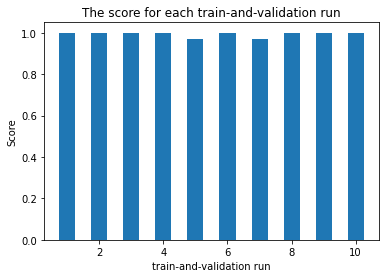

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
import socket
clf = svm.SVC(kernel='linear', C=1)
model_evaluation(clf,Xtfidf_train, ytfidf_train)

Naive_Bayes Cross-Validation Evaluation using TF-IDF data

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
scores = cross_val_score(clf,Xtfidf_train, ytfidf_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("K-fold cross validation each score: ",scores)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, Xtfidf_train,ytfidf_train, Xtfidf_test, ytfidf_test, 
        loss='0-1_loss',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

KNN Cross validation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(clf, Xtfidf_train, ytfidf_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("K-fold cross validation each score: ",scores)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, Xtfidf_train,ytfidf_train, Xtfidf_test, ytfidf_test, 
        loss='0-1_loss',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

DecisionTree Cross-Validation using TFIDF

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
scores = 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("K-fold cross validation each score: ",scores)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, Xtfidf_train,ytfidf_train, Xtfidf_test, ytfidf_test, 
        loss='0-1_loss',
        random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)


from mlxtend.evaluate import bias_variance_decomp
import socket
def SVM(XTF,YTF):

    clf = svm.SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, XTF, YTF, cv=10)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("K-fold cross val each score: ",scores)
    return scores

# n-grams in BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
count_vect_ngram = CountVectorizer(ngram_range = (2, 2))
all_records = np.array(join_words).reshape((-1,1))
BOWs_ngrams = count_vect_ngram.fit_transform(all_records.ravel()).toarray()
# print(len(BOWs[0]))
BOWs_ngrams

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_frame['BOW_n grams'] = list(BOWs_ngrams)

In [ ]:
data_frame

,sentences,Words,Authors_Names,BOW,BOW_n grams
0,make inquiry wish make yet Oh dear cannot begi...,"[make, inquiry, wish, make, yet, Oh, dear, can...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,burn wrong know keep remembrance married knew ...,"[burn, wrong, know, keep, remembrance, married...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,favour exercise patient answer short note Fair...,"[favour, exercise, patient, answer, short, not...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Woodhouse take Hartfield felt ought attempt pl...,"[Woodhouse, take, Hartfield, felt, ought, atte...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Churchill therefore seem thing even occur fort...,"[Churchill, therefore, seem, thing, even, occu...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
995,hole window shutter Archer immediately saw pie...,"[hole, window, shutter, Archer, immediately, s...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
996,never morrow yesterday day hesitate almost cer...,"[never, morrow, yesterday, day, hesitate, almo...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
997,come run call father voice heard instant oblig...,"[come, run, call, father, voice, heard, instan...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
998,china work cause go beg add put Flora delibera...,"[china, work, cause, go, beg, add, put, Flora,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
df = data_frame.sample(frac = 1)
df

,sentences,Words,Authors_Names,BOW,BOW_n grams
248,fear little men Wee folk good folk Trooping to...,"[fear, little, men, Wee, folk, good, folk, Tro...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
41,walk time garden scatter disperse way scarcely...,"[walk, time, garden, scatter, disperse, way, s...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
270,midst sky little bright Stars nice little lamp...,"[midst, sky, little, bright, Stars, nice, litt...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
437,upon heap stick dry leaf fall Alice bit hurt j...,"[upon, heap, stick, dry, leaf, fall, Alice, bi...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
940,mighty odd extraordinary one surprised meeting...,"[mighty, odd, extraordinary, one, surprised, m...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
167,unprepared reason believe lately determine muc...,"[unprepared, reason, believe, lately, determin...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
191,superiority ample acknowledgment Whatever alwa...,"[superiority, ample, acknowledgment, Whatever,...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
936,party know help Bursal canvas shall captain de...,"[party, know, help, Bursal, canvas, shall, cap...",2,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
457,behind occur well look see top stretch tiptoe ...,"[behind, occur, well, look, see, top, stretch,...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
import itertools
XBOW_ngrams = df['BOW_n grams'].to_numpy()
yBOW_ngrams = df.Authors_Names.to_numpy()
XBOW_ngrams = add_padding(XBOW_ngrams)
print (XBOW_ngrams)
print (len(XBOW_ngrams[0]))
print (type(XBOW_ngrams))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
52153
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
# X = df.BOW.to_numpy()
# y = df.Authors_Names.to_numpy()

XBOW_ngrams_train, XBOW_ngrams_test, yBOW_ngrams_train, yBOW_ngrams_test = train_test_split(XBOW_ngrams, yBOW_ngrams, random_state=42,test_size=0.3)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
import socket
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, XBOW_ngrams_train, yBOW_ngrams_train, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("K-fold cross val each score: ",scores)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf, XBOW_ngrams_train, yBOW_ngrams_train, XBOW_ngrams_test, yBOW_ngrams_test, 
        loss='0-1_loss',random_seed=123)
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

score =  100.0
[[55  0 11  0  0]
 [ 0 57  4  0  0]
 [ 0  0 55  0  0]
 [ 0  0 16 43  0]
 [ 0  0  2  0 57]]


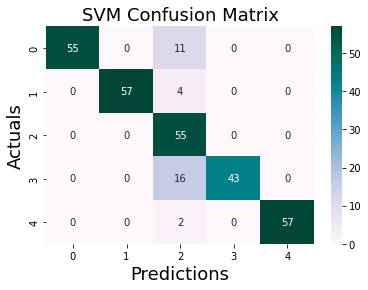

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        66
           1       1.00      0.93      0.97        61
           2       0.62      1.00      0.77        55
           3       1.00      0.73      0.84        59
           4       1.00      0.97      0.98        59

    accuracy                           0.89       300
   macro avg       0.93      0.89      0.89       300
weighted avg       0.93      0.89      0.90       300



In [ ]:
mode_svm = svm.SVC(kernel='linear', C=1).fit(XBOW_ngrams_train, yBOW_ngrams_train)
mode_svm.score(XBOW_ngrams_test, yBOW_ngrams_test)
y_pred=mode_svm.predict(XBOW_ngrams_test)
print("score = ",mode_svm.score(XBOW_ngrams_test,y_pred)*100)
confusion_matrix_binary_classes(yBOW_ngrams_test,y_pred)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(BOWs_ngrams)
X_train_tf_n_gram = tf_transformer.transform(BOWs_ngrams).toarray()

X_train_tf_n_gram

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_frame['tf_n grams'] = list(X_train_tf_n_gram)

In [ ]:
df = data_frame.sample(frac = 1)
df

,sentences,Words,Authors_Names,BOW,BOW_n grams,tf_n grams
251,wise kind true powerful good fairy land visit ...,"[wise, kind, true, powerful, good, fairy, land...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
769,caught frighten fish eat many Besides remember...,"[caught, frighten, fish, eat, many, Besides, r...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
819,firework know much gunpowder count house flee ...,"[firework, know, much, gunpowder, count, house...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
364,little boy one day little old woman make boy g...,"[little, boy, one, day, little, old, woman, ma...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
421,side spoke Alice much like keep close first Du...,"[side, spoke, Alice, much, like, keep, close, ...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
359,pity love knew cruel order father one Hebrews ...,"[pity, love, knew, cruel, order, father, one, ...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
249,strength keep line even avoid stone Sometimes ...,"[strength, keep, line, even, avoid, stone, Som...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
467,never ONE neck serpent use deny suppose tell n...,"[never, ONE, neck, serpent, use, deny, suppose...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
151,Churchill much good grace suspect quite fond F...,"[Churchill, much, good, grace, suspect, quite,...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
import itertools
Xtf_ngrams = df['tf_n grams'].to_numpy()
ytf_ngrams = df.Authors_Names.to_numpy()
Xtf_ngrams = add_padding(Xtf_ngrams)
print (Xtf_ngrams)
print (len(Xtf_ngrams[0]))
print (type(Xtf_ngrams))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
52153
<class 'numpy.ndarray'>


In [ ]:
Xtf_ngrams_train, Xtf_ngrams_test, ytf_ngrams_train, ytf_ngrams_test = train_test_split(Xtf_ngrams, ytf_ngrams, random_state=42,test_size=0.3)

Accuracy: 0.90 (+/- 0.10)
K-fold cross validation score: fo each  [0.97142857 0.84285714 0.92857143 0.88571429 0.92857143 0.94285714
 0.94285714 0.91428571 0.8        0.84285714]


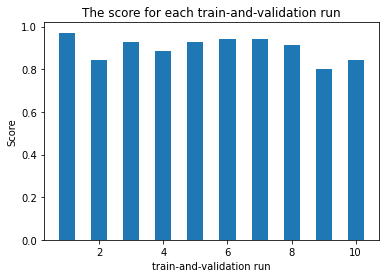

In [ ]:
clf = svm.SVC(kernel='linear', C=1)
model_evaluation(clf,Xtf_ngrams_train, ytf_ngrams_train)

In [ ]:
mode_svm = svm.SVC(kernel='linear', C=1).fit(Xtf_ngrams_train, ytf_ngrams_train)
mode_svm.score(Xtf_ngrams_test, ytf_ngrams_test)
y_pred=mode_svm.predict(XBOW_ngrams_test)
print("score = ",mode_svm.score(XBOW_ngrams_test,y_pred)*100)
confusion_matrix_binary_classes(yBOW_ngrams_test,y_pred)